## Day 2
### Galerkin Finite Element Solution of a Poisson Equation in One Dimension

In [1]:
using LinearAlgebra

In [2]:
function GenerateMesh(n)
    sigma = [0; 1];
    range(sigma[1], stop=sigma[2], length=n+1)
end

GenerateMesh (generic function with 1 method)

In [3]:
GenerateMesh(10)

0.0:0.1:1.0

In [4]:
function SourceFct(x)
    2 * sin(pi * x) + 4 * pi * (x - 1) * cos(pi * x) - pi ^ 2 * (x - 1)^2 * sin(pi * x)
end

SourceFct (generic function with 1 method)

In [5]:
SourceFct(5)

-50.26548245743679

In [6]:
function ExactSolu(x)
    -(x - 1)^2 * sin(pi * x)
end

ExactSolu (generic function with 1 method)

In [7]:
ExactSolu(5)

-9.797174393178826e-15

In [8]:
function GenerateTopology(n)
    elmat = trunc.(Int, zeros(n, 2))
    
    for i = 1:n
        elmat[i, 1] = i
        elmat[i, 2] = i + 1
    end
    
    elmat
end

GenerateTopology (generic function with 1 method)

In [9]:
elmat = GenerateTopology(7)

7×2 Array{Int64,2}:
 1  2
 2  3
 3  4
 4  5
 5  6
 6  7
 7  8

In [10]:
function GenerateElementMatrix(x_i0, x_i1)
    (1 / (x_i1 - x_i0)) * [1 -1; -1 1]
end

GenerateElementMatrix (generic function with 1 method)

In [11]:
GenerateElementMatrix(1, 2)

2×2 Array{Float64,2}:
  1.0  -1.0
 -1.0   1.0

In [12]:
function GenerateElementVector(x_i0, x_i1)
    ((x_i1 - x_i0) / 2) * [SourceFct(x_i0); SourceFct(x_i1)]
end

GenerateElementVector (generic function with 1 method)

In [13]:
GenerateElementVector(0, 1)

2-element Array{Float64,1}:
 -6.283185307179586     
  1.2246467991473532e-16

In [28]:
function AssembleMatrix(x, n)
    mesh = GenerateMesh(n);
    elmat = GenerateTopology(n);
    S = zeros(n + 1, n + 1);
    
    for i = 1:n
        S_e_i = GenerateElementMatrix(mesh[i], mesh[i + 1]);
        
        for j = 1:2
            for k = 1:2
                S[elmat[i, j], elmat[i, k]] = S[elmat[i, j], elmat[i, k]] + S_e_i[j, k];
            end
        end
    end
    
    S
end

AssembleMatrix (generic function with 1 method)

In [29]:
AssembleMatrix(1, 5)

6×6 Array{Float64,2}:
  5.0  -5.0   0.0   0.0   0.0   0.0
 -5.0  10.0  -5.0   0.0   0.0   0.0
  0.0  -5.0  10.0  -5.0   0.0   0.0
  0.0   0.0  -5.0  10.0  -5.0   0.0
  0.0   0.0   0.0  -5.0  10.0  -5.0
  0.0   0.0   0.0   0.0  -5.0   5.0

In [32]:
function AssembleVector(x, n)
    mesh = GenerateMesh(n);
    elmat = GenerateTopology(n);
    f = zeros(n + 1, 1);
    
    for i = 1:n
        f_e_i = GenerateElementVector(mesh[i], mesh[i + 1]);
        
        for j = 1:2
            f[elmat[i, j]] = f[elmat[i, j]] + f_e_i[j];
        end
    end
    
    f
end

AssembleVector (generic function with 1 method)

In [33]:
AssembleVector(7.5, 4)

5×1 Array{Float64,2}:
 -1.5707963267948966   
 -2.293930489290331    
 -0.11685027506808499  
  0.799869004743712    
  3.061616997868383e-17

In [53]:
function Assemble(x, n)
    S = AssembleMatrix(x, n);
    S[1, 1] = 1.0;
    S[1, 2] = 0.0;

    f = AssembleVector(x, n);
    f[1] = 0.0;
    
    return S, f
end

Assemble (generic function with 1 method)

In [56]:
x = 0;
n = 1000;

S, f = Assemble(x, n);

In [57]:
using SparseArrays
using Plots

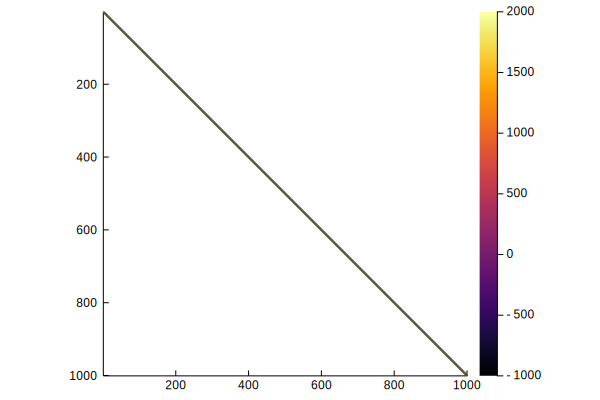

In [58]:
spy(sparse(S))

In [60]:
u_h = S \ f;

In [47]:
mesh = GenerateMesh(n)
u = zeros(n+1)

for i = 1:n+1
    u[i] = ExactSolu(mesh[i])
end

### Error between exact and approximate solution

In [49]:
err = sum(u_h - u)

-2.625661880992476e-7

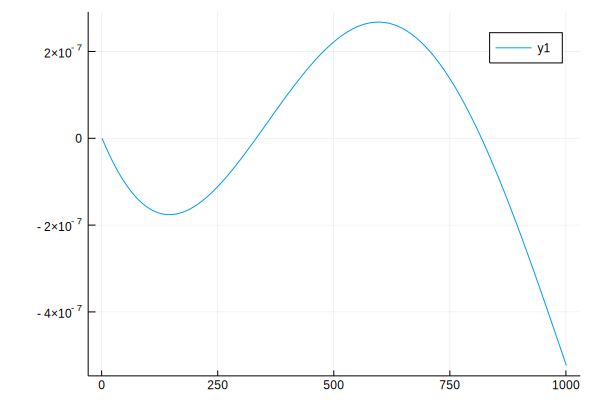

In [50]:
plot(u_h - u)